In [1]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [2]:
from torchnetjson.builder import build_net

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training.training_aux import load_training_results
from thesis_v2.training_extra.misc import count_params
from thesis_v2.models.maskcnn_polished_with_local_pcn.builder import load_modules

load_modules()

In [4]:
folder_to_check = 'scripts/training/yuanyuan_8k_a_3day/maskcnn_polished_with_local_pcn'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit_certain_configs import param_iterator_obj
from key_utils import keygen

In [5]:
def load_everything():
    _df_collect = []
    for idx, param in enumerate(param_iterator_obj.generate()):
        if idx % 50 == 0:
            print(idx)
            
#         print(len(param))
        
        assert len(param) == 23
        assert param['split_seed'] == 'legacy'
        assert param['out_channel'] == 16
        assert param['num_layer'] == 2
        assert param['kernel_size_l1'] == 9
        assert param['pooling_ksize'] == 3
        assert param['pooling_type'] == 'avg'
        
#         assert param['model_seed'] == 0
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        # 10 to go.
        result = load_training_results(key, return_model=False)
        # load twice, first time to get the model.
        result = load_training_results(key, return_model=True, model=build_net(result['config_extra']['model']))
        num_epochs = [len(x) for x in result['stats_all']]
        _df_collect.append(
            {
#                 'split_seed': str(param['split_seed']),
                
                
                'act_fn': param['act_fn'],
                'bn_before_act': param['bn_before_act'],
                'bn_after_fc': param['bn_after_fc'],
                'input_size': param['input_size'],
                'loss_type': param['loss_type'],
                
                # 12 to go
                
                'scale': float(param['scale']),
                # 
                'smoothness': float(param['smoothness']),
                # 
                
                # 8 to go
                'pcn_bn': param['pcn_bn'],
                'pcn_bn_post': param['pcn_bn_post'],
                'pcn_bypass': param['pcn_bypass'],
                'pcn_final_act': param['pcn_final_act'],
                'pcn_no_act': param['pcn_no_act'],
                'pcn_bias': param['pcn_bias'],
                
                'pcn_cls': param['pcn_cls'],
                
                'model_seed': param['model_seed'],
                
                'corr_test': result['stats_best']['stats']['test']['corr_mean'],
                'max_epoch': max(num_epochs),
                'num_param': count_params(result['model']),
            }
        )
        _df =  pd.DataFrame(_df_collect, columns=[
#             'split_seed',
            'act_fn', 'bn_before_act', 'bn_after_fc',
            'input_size', 'loss_type', 'scale',
            'smoothness',
            
            'pcn_bn', 'pcn_bn_post', 'pcn_bypass', 'pcn_final_act', 'pcn_no_act', 'pcn_bias', 'pcn_cls',
            'model_seed',
            
            'corr_test', 'num_param',
            'max_epoch',
            
                                                 ])
        _df = _df.set_index([
            'act_fn', 'bn_before_act', 'bn_after_fc',
            'input_size', 'loss_type', 'scale',
            'smoothness',
            'pcn_bn', 'pcn_bn_post', 'pcn_bypass', 'pcn_final_act', 'pcn_no_act', 'pcn_bias', 'pcn_cls',
            'model_seed',
        ],verify_integrity=True)
    return _df

In [6]:
df = load_everything()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150


In [7]:
corr_mean = df['corr_test'].unstack('model_seed').mean(axis=1)
corr_std = df['corr_test'].unstack('model_seed').std(axis=1)

In [8]:
corr_mean.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     True          False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.487756   
                                                                                                       True          False      True      0.489102   
                                                                                True        False      False         False      True      0.512897   
                                                                                                       True          False      True      0.512757   
                                                                         True   False       False      False         False      True      0.511536   
                                                                                                       True          False      True      0.508198   
                                                                                True        False      False         False      True      0.511447   
                                                                                                       True          False      True      0.514912   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.464499   
                                                                                                       True          False      True      0.464433   
                                                                                True        False      False         False      True      0.504216   
                                                                                                       True          False      True      0.506596   
                                                                         True   False       False      False         False      True      0.504216   
                                                                                                       True          False      True      0.505144   
                                                                                True        False      False         False      True      0.505982   
                                                                                                       True          False      True      0.510728   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.404600   
                                                                                                       True          False      True      0.404413   
                                                                                True        False      False         False      True      0.525226   
                                                                                                       True          False      True      0.523913   
                                                                         True   False       False      False         False      True      0.525362   
                                                                                                       True          False      True      0.520440   
                                                                                True        False      False         False      True      0.529292   
                                                                                                       True          False      True      0.527674   
                                              poisson   0.01  0.000005   False  False       False   

In [9]:
corr_std.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     True          False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.007928   
                                                                                                       True          False      True      0.005612   
                                                                                True        False      False         False      True      0.001248   
                                                                                                       True          False      True      0.001289   
                                                                         True   False       False      False         False      True      0.001344   
                                                                                                       True          False      True      0.003332   
                                                                                True        False      False         False      True      0.001875   
                                                                                                       True          False      True      0.001840   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.009257   
                                                                                                       True          False      True      0.009304   
                                                                                True        False      False         False      True      0.003232   
                                                                                                       True          False      True      0.007333   
                                                                         True   False       False      False         False      True      0.003232   
                                                                                                       True          False      True      0.009897   
                                                                                True        False      False         False      True      0.004164   
                                                                                                       True          False      True      0.005070   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.001386   
                                                                                                       True          False      True      0.001560   
                                                                                True        False      False         False      True      0.002246   
                                                                                                       True          False      True      0.004776   
                                                                         True   False       False      False         False      True      0.002300   
                                                                                                       True          False      True      0.006242   
                                                                                True        False      False         False      True      0.000594   
                                                                                                       True          False      True      0.001391   
                                              poisson   0.01  0.000005   False  False       False   

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def scatter(x, y, xlabel, ylabel, title):
    
    # only check high performing cases.
    selector = np.logical_and(x>=0.5, y>=0.5)
    x=x[selector]
    y=y[selector]
    
    plt.close('all')
    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, s=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.xlim(0.5,0.55)
    plt.ylim(0.5,0.55)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.title(title)
    plt.show()
    print('y-x mean', (y-x).mean(), 'y-x>0 mean', ((y-x)>0).mean())
    print('y top', y.max(), 'x top', x.max())

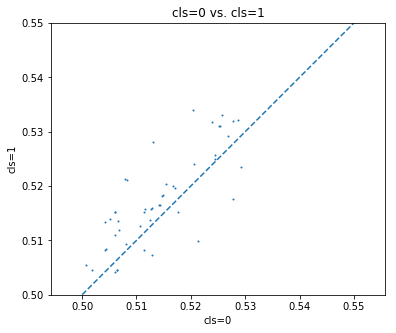

y-x mean 0.0033973604440689087 y-x>0 mean 0.8125
y top 0.533920168876648 x top 0.5292917887369791


In [11]:
scatter(corr_mean.unstack('pcn_cls').values[:,0], corr_mean.unstack('pcn_cls').values[:,1], 'cls=0', 'cls=1', 'cls=0 vs. cls=1')

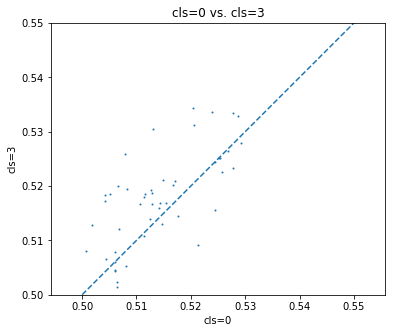

y-x mean 0.0037136218614048414 y-x>0 mean 0.6458333333333334
y top 0.5342767039934794 x top 0.5292917887369791


In [12]:
scatter(corr_mean.unstack('pcn_cls').values[:,0], corr_mean.unstack('pcn_cls').values[:,3], 'cls=0', 'cls=3', 'cls=0 vs. cls=3')

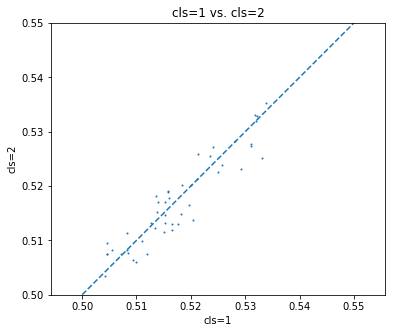

y-x mean -0.0004144925624132087 y-x>0 mean 0.5
y top 0.5353569984436035 x top 0.533920168876648


In [13]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,2], 'cls=1', 'cls=2', 'cls=1 vs. cls=2')

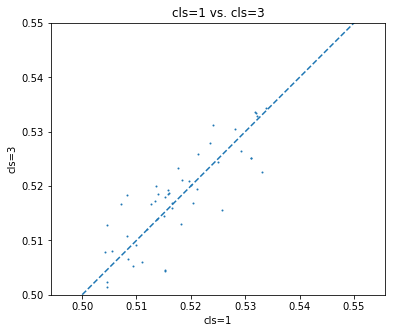

y-x mean 0.00031626141733593255 y-x>0 mean 0.6041666666666666
y top 0.5342767039934794 x top 0.533920168876648


In [14]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,3], 'cls=1', 'cls=3', 'cls=1 vs. cls=3')

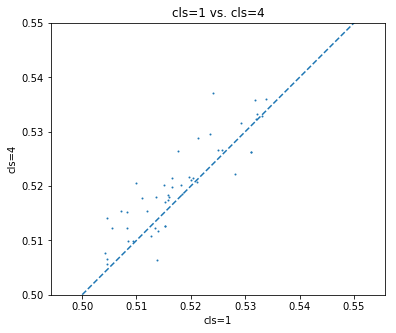

y-x mean 0.0023119449615478494 y-x>0 mean 0.7708333333333334
y top 0.5370840430259705 x top 0.533920168876648


In [15]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,4], 'cls=1', 'cls=4', 'cls=1 vs. cls=4')

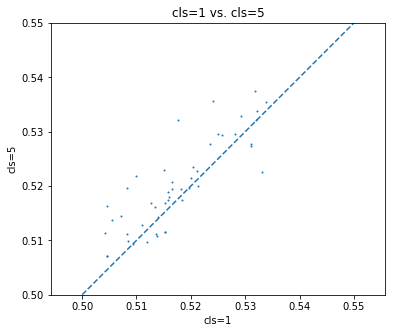

y-x mean 0.0026219476842218037 y-x>0 mean 0.7708333333333334
y top 0.5374959309895834 x top 0.533920168876648


In [16]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,5], 'cls=1', 'cls=5', 'cls=1 vs. cls=5')

In [17]:
def plot_step_increase(pairs_to_check):
    # remove those no innner act ones.
    df_unstacked = corr_mean.unstack('pcn_cls')
#     df_unstacked = corr_mean.unstack('pcn_cls')
    print(df_unstacked.shape)
    
    selector = df_unstacked.values[:,0] >= 0.50
#     selector = ()
    print(selector.mean())
    
    cls_values = df_unstacked.columns.values.tolist()
    print(cls_values)
    assert cls_values == list(range(len(cls_values)))
    
    for p1, p2 in pairs_to_check:
        val0 = df_unstacked.values[:,p1][selector]
        val1 = df_unstacked.values[:,p2][selector]

        # selection
        
        print(f'{p2} - {p1}', 'mean', (val1-val0).mean(), 'std', (val1-val0).std())
# trend for 0-1-2 is good. then bad.
plot_step_increase([(0,1),(1,2),(2,3),(3,5),(2,5)])

(64, 6)
0.75
[0, 1, 2, 3, 4, 5]
1 - 0 mean 0.0033973604440689087 std 0.005371437172332317
2 - 1 mean -0.0004144925624132087 std 0.0031443520999068853
3 - 2 mean 0.0007307539797491413 std 0.0040487778451763524
5 - 3 mean 0.002305686266885871 std 0.0047480543742656105
5 - 2 mean 0.0030364402466350124 std 0.005288806596847002


In [18]:
corr_mean.unstack('pcn_cls')

pcn_cls                                                                                                                                          0  \
act_fn   bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu     True          False       50         mse       0.01  0.000005   False  False       False      False         False      True      0.487756   
                                                                                                       True          False      True      0.489102   
                                                                                True        False      False         False      True      0.512897   
                                                                                                       True          False      True      0.512757   
                                                                         True   False       False      False         False      True      0.511536   
                                                                                                       True          False      True      0.508198   
                                                                                True        False      False         False      True      0.511447   
                                                                                                       True          False      True      0.514912   
                                              poisson   0.01  0.000005   False  False       False      False         False      True      0.464499   
                                                                                                       True          False      True      0.464433   
                                                                                True        False      False         False      True      0.504216   
                                                                                                       True          False      True      0.506596   
                                                                         True   False       False      False         False      True      0.504216   
                                                                                                       True          False      True      0.505144   
                                                                                True        False      False         False      True      0.505982   
                                                                                                       True          False      True      0.510728   
                                   100        mse       0.01  0.000005   False  False       False      False         False      True      0.404600   
                                                                                                       True          False      True      0.404413   
                                                                                True        False      False         False      True      0.525226   
                                                                                                       True          False      True      0.523913   
                                                                         True   False       False      False         False      True      0.525362   
                                                                                                       True          False      True      0.520440   
                                                                                True        False      False         False      True      0.529292   
                                                                                                       True          False      True      0.527674   
                                              poisson   0.01  0.000005   False  False       False   